In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

sns.set_style('white')
sns.set_palette('Set2')

# Load and clean data

In [26]:
# train data
train = pd.read_csv('/content/diabetes_train.csv')

# test data
test = pd.read_csv('/content/diabetes_test.csv')

In [3]:
train.shape

(70692, 22)

In [27]:
test.shape

(23391, 22)

In [5]:
train.columns


Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [28]:
test.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
# check missing values
train.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [29]:
test.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    1
PhysActivity            1
Fruits                  1
Veggies                 1
HvyAlcoholConsump       1
AnyHealthcare           1
NoDocbcCost             1
GenHlth                 1
MentHlth                1
PhysHlth                1
DiffWalk                1
Sex                     1
Age                     1
Education               1
Income                  1
dtype: int64

In [10]:
train.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [30]:
test.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [12]:
# describe the data
train.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Categorical variables

In [14]:

cat_socialandeconomical = ['Age', 'Sex', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']
cat_disease = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
cat_health = ['GenHlth', 'MentHlth', 'PhysHlth']
cat_habit = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

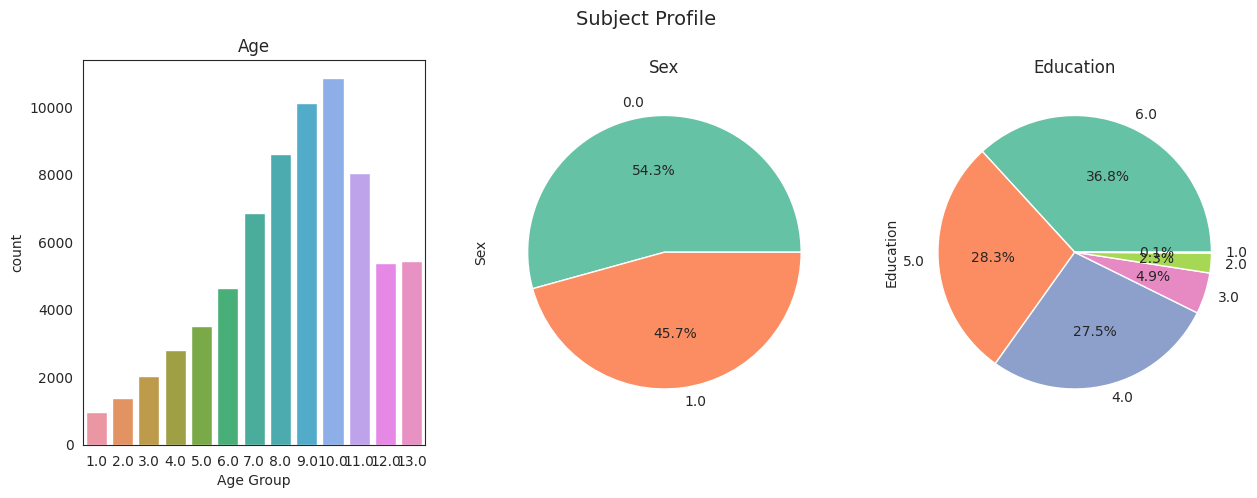

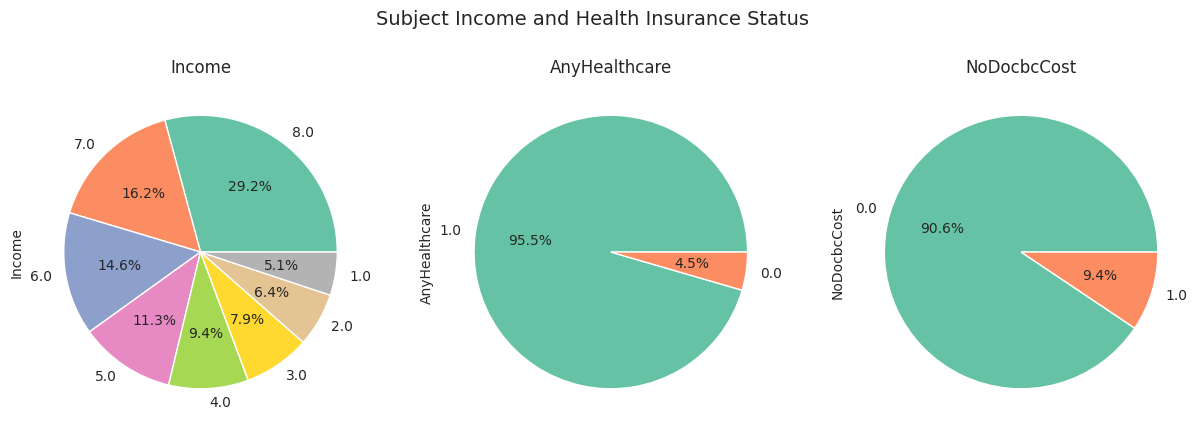

In [15]:
# Let's first check the social and economic status of the subjects

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes = axes.flatten()
sns.countplot(x='Age', data=train, ax=axes[0])
axes[0].set_title('Age')
axes[0].set_xlabel('Age Group')

for i, col in enumerate(['Sex', 'Education']):
    train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i+1], title=col)
plt.suptitle('Subject Profile', fontsize=14)
plt.show()

# what are the
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
for i, col in enumerate(['Income', 'AnyHealthcare', 'NoDocbcCost']):
    train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], title=col)
plt.suptitle('Subject Income and Health Insurance Status', fontsize=14)
plt.show()

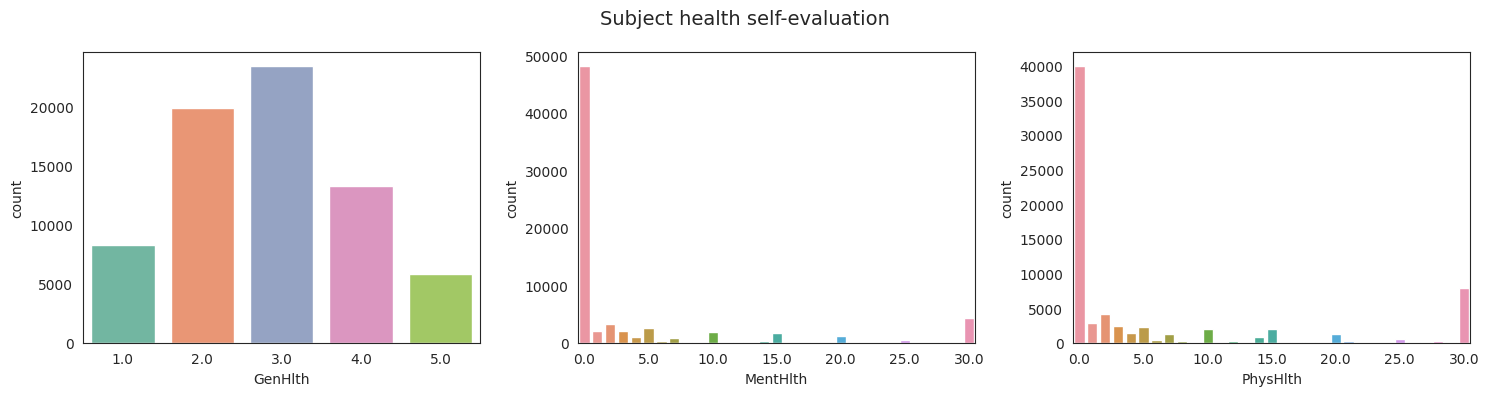

In [16]:

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()
for i, col in enumerate(cat_health):
    g = sns.countplot(x=col, data=train, ax=axes[i])
    if len(train[col].unique()) > 5:
        g.set_xticks(np.arange(0, len(train[col].unique()), 5))
plt.suptitle('Subject health self-evaluation', fontsize=14)
plt.tight_layout()
plt.show()

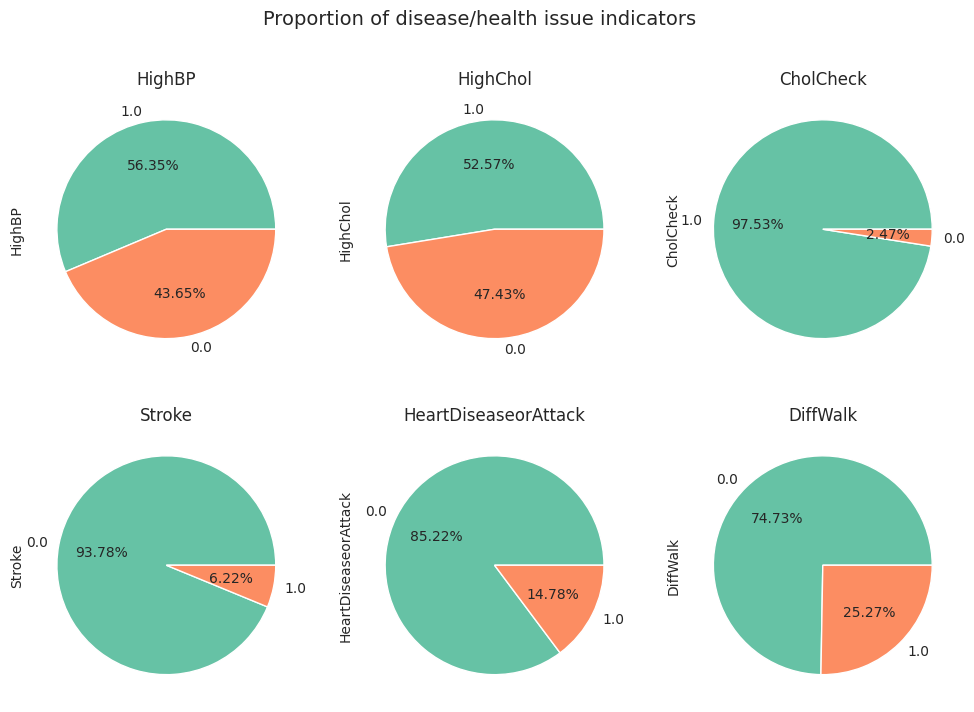

In [17]:

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(cat_disease):
    train[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of disease/health issue indicators', fontsize=14)
plt.show()


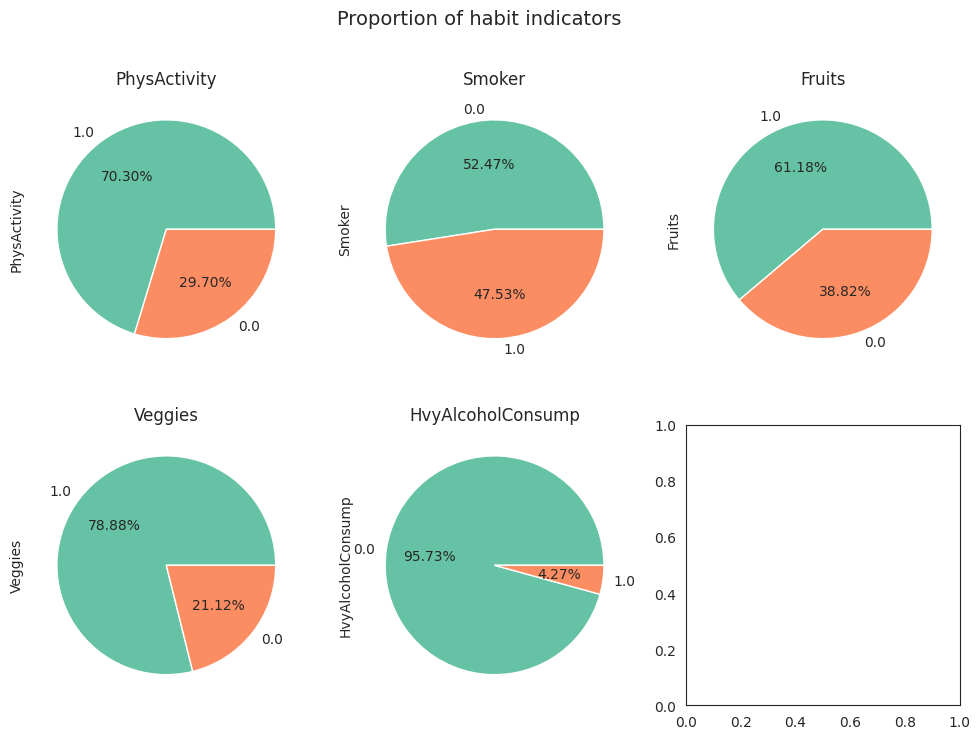

In [18]:

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(cat_habit):
    train[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of habit indicators', fontsize=14)
plt.show()


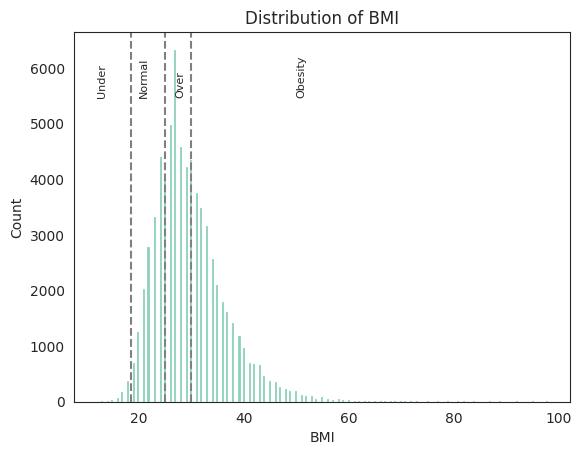

In [19]:
# plot the distribution of BMI

plt.axvline(18.5, color='gray', linestyle='--')
plt.axvline(24.9, color='gray', linestyle='--')
plt.axvline(29.9, color='gray', linestyle='--')

# add text
plt.text(12, 5500, 'Under', rotation=90, size=8)
plt.text(20, 5500, 'Normal', rotation=90, size=8)
plt.text(27, 5500, 'Over', rotation=90, size=8)
plt.text(50, 5500, 'Obesity', rotation=90, size=8)

sns.histplot(train['BMI'], kde=False)

plt.title('Distribution of BMI')
plt.show()

# Relationship between features and target

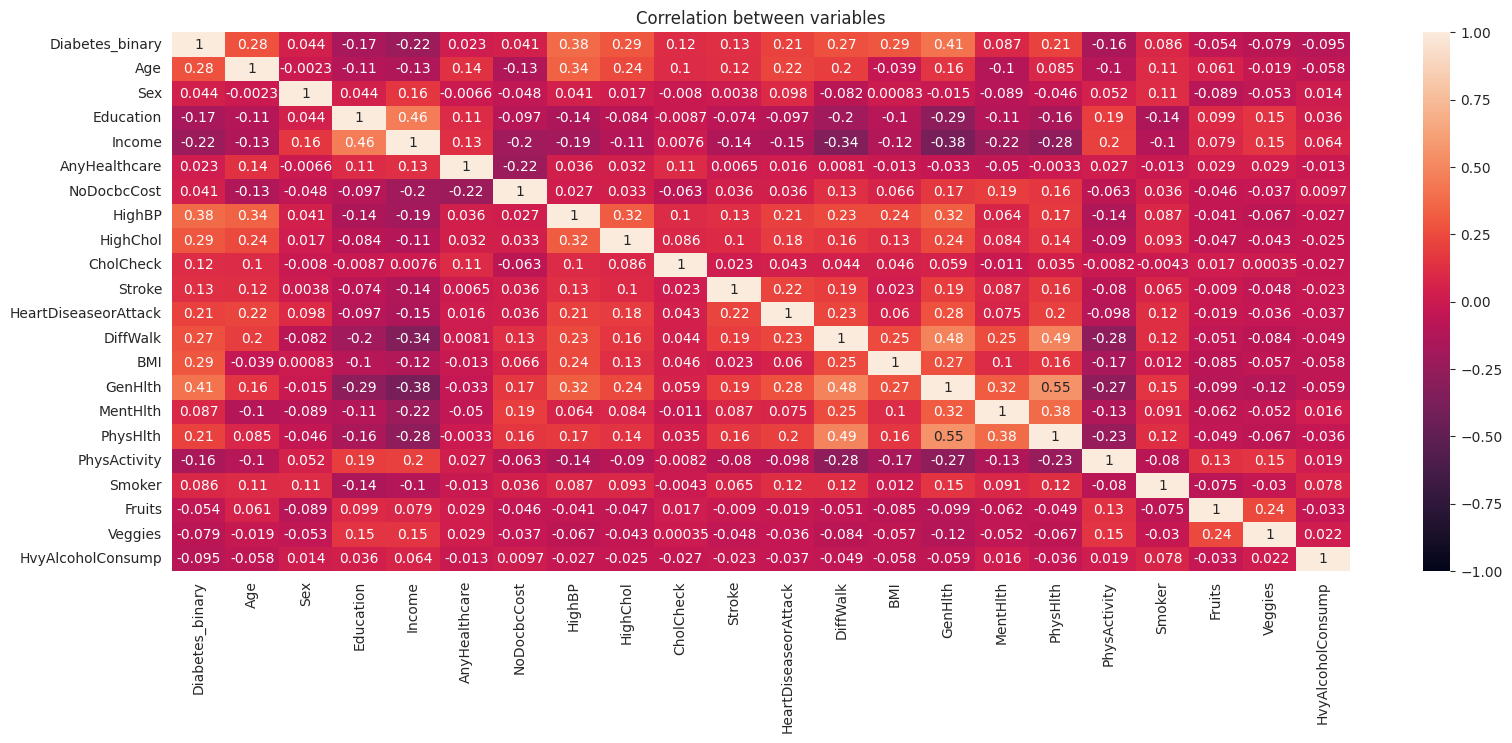

In [23]:
# plot a heatmap to check the correlation between the variables


cols = ['Diabetes_binary'] + cat_socialandeconomical + cat_disease +  ['BMI'] + cat_health + cat_habit

plt.figure(figsize=(19, 7))
# nomralize the color scale
sns.heatmap(train[cols].corr(), annot=True,  vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()


In [24]:

train.corr()['Diabetes_binary'].abs().sort_values(ascending=False).head(15)


Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
Income                  0.224449
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Education               0.170481
PhysActivity            0.158666
Stroke                  0.125427
CholCheck               0.115382
HvyAlcoholConsump       0.094853
Name: Diabetes_binary, dtype: float64

## Data preprocessing

In [31]:
# split the data into X and y
X = train.drop('Diabetes_binary', axis=1)
y = train['Diabetes_binary']

# split the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = test.drop('Diabetes_binary', axis=1)
y_test = test['Diabetes_binary']

In [32]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [38]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier( n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
acc1=accuracy_score(y_test,y_pred)
acc1

0.7338292505664572

Text(0.5, 1.03, 'Confusion Matrix for Adaboost Classifier')

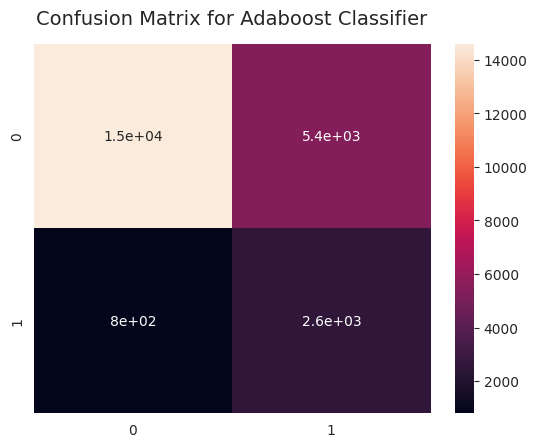

In [39]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Adaboost Classifier", fontsize=14, fontname="DejaVu Sans", y=1.03)

In [40]:
print ("Accuracy: " + str(accuracy_score(y_pred, y_test)))
print ("Precision: " + str(precision_score(y_pred, y_test)))
print ("Recall: " + str(recall_score(y_pred, y_test)))
print ("F1: " + str(f1_score(y_pred, y_test)))

Accuracy: 0.7338292505664572
Precision: 0.762782401902497
Recall: 0.32099074305729297
F1: 0.45184011269589713


In [41]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.6 MB/s eta 0:00:00


In [42]:
from catboost import CatBoostClassifier
catboost = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_seed=42)
catboost.fit(X_train,y_train)
y_pred2 =  catboost.predict(X_test)
acc2=accuracy_score(y_test,y_pred2)


0:	learn: 0.6573129	total: 95.2ms	remaining: 9.43s
1:	learn: 0.6288979	total: 132ms	remaining: 6.46s
2:	learn: 0.6072896	total: 171ms	remaining: 5.52s
3:	learn: 0.5893133	total: 208ms	remaining: 4.99s
4:	learn: 0.5760171	total: 244ms	remaining: 4.63s
5:	learn: 0.5647028	total: 279ms	remaining: 4.37s
6:	learn: 0.5556077	total: 317ms	remaining: 4.21s
7:	learn: 0.5477340	total: 349ms	remaining: 4.01s
8:	learn: 0.5417821	total: 383ms	remaining: 3.87s
9:	learn: 0.5366154	total: 418ms	remaining: 3.76s
10:	learn: 0.5320821	total: 453ms	remaining: 3.66s
11:	learn: 0.5278829	total: 483ms	remaining: 3.54s
12:	learn: 0.5247031	total: 525ms	remaining: 3.51s
13:	learn: 0.5223120	total: 561ms	remaining: 3.45s
14:	learn: 0.5199222	total: 597ms	remaining: 3.38s
15:	learn: 0.5176893	total: 630ms	remaining: 3.31s
16:	learn: 0.5158574	total: 662ms	remaining: 3.23s
17:	learn: 0.5140433	total: 696ms	remaining: 3.17s
18:	learn: 0.5125715	total: 733ms	remaining: 3.13s
19:	learn: 0.5110900	total: 776ms	remain

In [43]:
acc2

0.7220298405369586

In [45]:
print ("Accuracy: " + str(accuracy_score(y_pred2, y_test)))
print ("Precision: " + str(precision_score(y_pred2, y_test)))
print ("Recall: " + str(recall_score(y_pred2, y_test)))
print ("F1: " + str(f1_score(y_pred2, y_test)))

Accuracy: 0.7220298405369586
Precision: 0.796076099881094
Recall: 0.3152813750882976
F1: 0.45167819193793224


Text(0.5, 1.03, 'Confusion Matrix for Catboostboost Classifier')

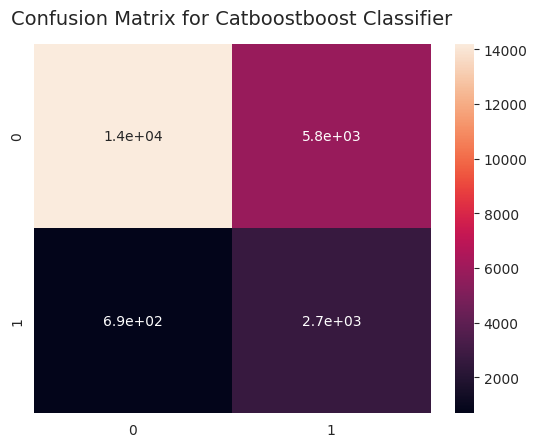

In [46]:
cf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Catboostboost Classifier", fontsize=14, fontname="DejaVu Sans", y=1.03)

In [47]:

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
dt.fit(X_train,y_train)
y_pred3 =  dt.predict(X_test)
acc3=accuracy_score(y_test,y_pred3)

In [48]:
acc3

0.7360950793040059

In [49]:
print ("Accuracy: " + str(accuracy_score(y_pred3, y_test)))
print ("Precision: " + str(precision_score(y_pred3, y_test)))
print ("Recall: " + str(recall_score(y_pred3, y_test)))
print ("F1: " + str(f1_score(y_pred3, y_test)))

Accuracy: 0.7360950793040059
Precision: 0.9233055885850179
Recall: 0.3443077264161401
F1: 0.5015744852644328


Text(0.5, 1.03, 'Confusion Matrix for Decision tree Classifier')

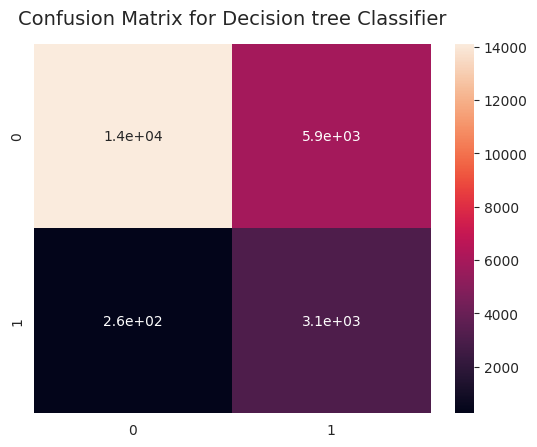

In [50]:
cf_matrix = confusion_matrix(y_test, y_pred3)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Decision tree Classifier", fontsize=14, fontname="DejaVu Sans", y=1.03)

In [51]:
from sklearn.svm import SVC
svm= SVC(random_state=0)
svm.fit(X_train, y_train)

SVC(random_state=0)

In [52]:
y_pred4 =  svm.predict(X_test)
acc4=accuracy_score(y_test,y_pred4)

In [53]:
acc4

0.7120687443888675

In [54]:
print ("Accuracy: " + str(accuracy_score(y_pred4, y_test)))
print ("Precision: " + str(precision_score(y_pred4, y_test)))
print ("Recall: " + str(recall_score(y_pred4, y_test)))
print ("F1: " + str(f1_score(y_pred4, y_test)))

Accuracy: 0.7120687443888675
Precision: 0.8097502972651606
Recall: 0.3088785576595986
F1: 0.44718049741442994


Text(0.5, 1.03, 'Confusion Matrix for SVM')

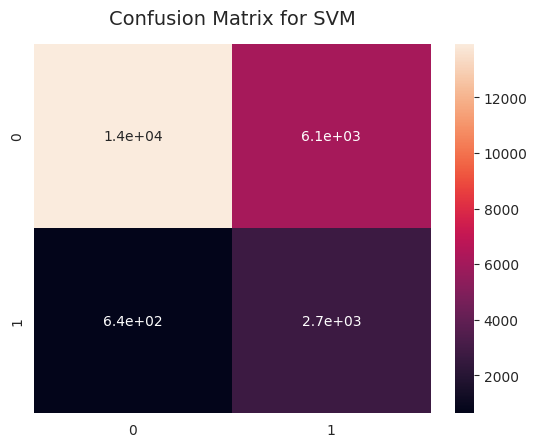

In [55]:
cf_matrix = confusion_matrix(y_test, y_pred4)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM", fontsize=14, fontname="DejaVu Sans", y=1.03)

In [56]:
log = LogisticRegression(solver = "liblinear")
log.fit(X_train, y_train)
y_pred5= log.predict(X_test)
acc5= accuracy_score(y_test, y_pred5)

In [57]:
acc5

0.7333162327390876

In [58]:
print ("Accuracy: " + str(accuracy_score(y_pred5, y_test)))
print ("Precision: " + str(precision_score(y_pred5, y_test)))
print ("Recall: " + str(recall_score(y_pred5, y_test)))
print ("F1: " + str(f1_score(y_pred5, y_test)))

Accuracy: 0.7333162327390876
Precision: 0.7580261593341261
Recall: 0.3197893152746426
F1: 0.4498147821485271


Text(0.5, 1.03, 'Confusion Matrix for  Logistic Regression')

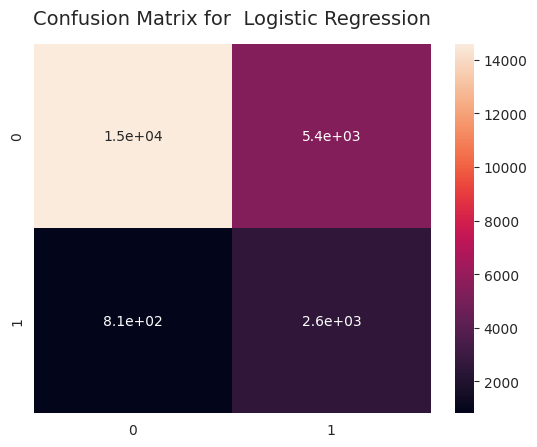

In [59]:
cf_matrix = confusion_matrix(y_test, y_pred5)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for  Logistic Regression", fontsize=14, fontname="DejaVu Sans", y=1.03)